### lINEAR REGRESSION

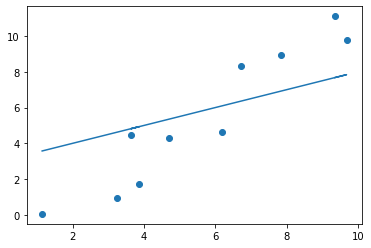

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#lets create a linear distribution with dummy data simulating the
#relationship between mouse weight and mouse length
mw = np.random.randint(-100,100,10)/65+np.linspace(1,10,10)
ml = np.random.randint(-100,100,10)/65+np.linspace(1,10,10)
plt.scatter(mw,ml,label='data')

#lets draw an arbitrsry line to repressent the data

slope = 0.5
intersect = 3
ylin = mw*slope + intersect
plt.plot(mw,ylin)


Residual: is the distance between a point of the data and the line of the prediction model $r=y_i-f(x_i)$
Sum of Square differences
$$SS=\sum_{i}^{n}(r_i)^2=\sum_{i=1}^{n}(y_i-f(x_i))^2$$
The objective of the linear regression is to minimize SS

\begin{equation*}
SS_{min} =  SS(m,b)\;\;|\;\; \frac{\partial SS}{\partial m}=0\;\;\land\;\;\frac{\partial SS}{\partial b}=0\\
SS=\sum\limits_{i=1}^n(y_i-(mx_i+b))^2=\sum\limits_{i=1}^n (y_i^2-2y_i(mx_i+b)+(mx_i+b)^2)\\
SS=\sum\limits_{i=1}^n(y_i^2-2mx_iy_i-2by_i+m^2x_i^2+2mbx_i+b^2)\\
SS=\sum\limits_{i=1}^n y_i^2 -2m \sum\limits_{i=1}^n x_iy_i -2b \sum\limits_{i=1}^n y_i + m^2 \sum\limits_{i=1}^nx_i^2 +2mb \sum\limits_{i=1}^n x_i + \sum\limits_{i=1}^n b^2\\
SS=n\overline{y^2}-2mn\overline{xy}-2bn\overline{y}+nm^2\overline{x^2}+2nmb\overline{x}+nb^2\\
\frac{\partial SS}{\partial b}=0=\frac{\partial}{\partial b}(n\overline{y^2}-2mn\overline{xy}-2bn\overline{y}+nm^2\overline{x^2}+2nmb\overline{x}+nb^2\\
-2n\overline{y}+2nm\overline{x}+2bn=0\\
2n(m\overline{x}-\overline{y}+b)=0\\
\end{equation*}
$${\color{blue}{b=\overline{y}-m\overline{x}}}$$


\begin{equation*}
\frac{\partial SS}{\partial m}=0=\frac{\partial}{\partial m}(n\overline{y^2}-2mn\overline{xy}-2bn\overline{y}+nm^2\overline{x^2}+2nmb\overline{x}+nb^2)\\
-2n\overline{xy}+2nm\overline{x^2}+2nb\overline{x}=0\\
2n(-\overline{xy}+m\overline{x^2}+b\overline{x})=0\\
-\overline{xy}+m\overline{x^2}+b\overline{x}=0\\
-\overline{xy}+m\overline{x^2}+(\overline{y}-m\overline{x})\overline{x}=0\\
-\overline{xy}+m\overline{x^2}+\overline{y}\cdot\overline{x}-m\overline{x}^2=0\\
(\overline{x^2}-\overline{x}^2)m=\overline{xy}-\overline{y}\cdot\overline{x}\\
\end{equation*}
$${\color{blue}{m=\frac{\overline{xy}-\overline{y}\cdot\overline{x}}{\overline{x^2}-\overline{x}^2}}}$$


63.12053254437869


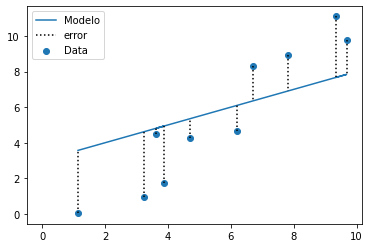

In [2]:
s1=np.sum(np.power((ml-ylin),2))
print(s1)
#lets draw some lines to ilustrate de differences between the prediction an the model
slope = 0.3
intersect = 4
plt.scatter(mw,ml,label='Data')
plt.plot(mw,ylin,label='Modelo')
for i in range(10):
    plt.plot([mw[i],mw[i]],[ml[i],ylin[i]],':k')
plt.plot(0,0,':k',label='error')
plt.legend();plt.show()

30.30140828402367


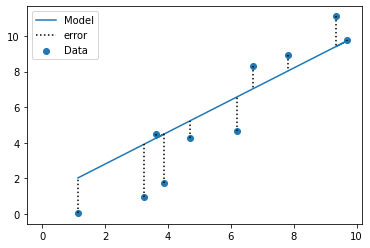

In [3]:
#lets choose another model incrementing the slope and reducing the intersect
#to see if S is lower
slope = 0.90
intersect  = 1
ylin2 = slope*mw + intersect
residuals = ml-ylin2
s2=np.sum(np.power((ml-ylin2),2))
print(s2)
#lets draw some lines to ilustrate de differences
plt.scatter(mw,ml,label='Data')
plt.plot(mw,ylin2,label='Model')
for i in range(10):
    plt.plot([mw[i],mw[i]],[ml[i],ylin2[i]],':k')
plt.plot(0,0,':k',label='error')
plt.legend();


S got reduced considerably rotating the line in the counter clockwise direction. if this process of rotating the line is repeated carefully, then we can select the minimun value of S as **the best fit** for our data set. Thus we have found the best predictor.
the rotation of the line should happen with the mean of the target variable in this case mause length ( ml ). y=mx+b

In [7]:
#using the formula
x_mean, y_mean,  = mw.mean(), ml.mean()
x2_mean, xy_mean = (np.power(mw,2)).mean(), (mw*ml).mean()
m =(xy_mean-x_mean*y_mean)/(x2_mean-np.power(x_mean,2))
b = y_mean-m*x_mean
print("Slope: ",m,'\nIntersect: ',b)

Slope:  1.3286822184853166 
Intersect:  -2.0543163105765316


#### DOING IT WITH SCIKIT-LEARN

In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
data=mw[:,np.newaxis]
model.fit(data,ml)
print(f"Slope: {model.coef_}\nY-interception:{model.intercept_}")

Slope: [1.32868222]
Y-interception:-2.054316310576527


<font color='red'>This same method can be applied to data of N dimensions in the same way </font>

### COEFFICIENT OF DETERMINATION $R^2$

IS DEFINED AS THE PROPORTION OF THE VARIANCE OF THE DEPENDENT VARIABLE THAT IS EXPLAINED BY DE INDEPENDENT VARIABLE, IN OTHER WORDS IS THE RATIO BETWEEN THE VARIATIONS OF THE DEPENDENT VARIABLE EXPLAINED BY THE INDEPENDENT VARIABLE AND THE VARIATION OF THE DEPENDENT VARIABLE WITHOUT TAKING INTO ACCOUNT THE INDEPENDENT VARIABLE<br><br>
Variance of a population
$$\sigma^2 = \frac{ \sum_{i=1}^{n}(y_i-\mu)^2 }{n}\quad = \quad \frac{\sum_{i=1}^{n} y_{i}^{2}}{n}-\mu^2$$ 

variance of the prediction model: $$VAR^2 = \frac{ \sum_{i=1}^{n}(y_i-f(x_i))^2 }{n}$$ <br>Coeficient of determination( R squared ):<br>
$$R^2=\frac{\sigma^2-VAR^2}{\sigma^2}$$
Expressed in terms of the sum of the squared differences

$$R^2=1-\frac{\frac{ \sum_{i=1}^{n}(y_i-f(x_i))^2 }{ n }}{\frac{ \sum_{i=1}^{n}(y_i-\mu)^2 }{n}}=1-\frac{SS_{fit}}{SS_{mean}}$$<br> 
DEGREES OF FREEDOM
Are the total independent parameters of a model, for instance $y=a+bx+cx^2+dx^3+gx^4$ has a degree of freedom of 2, 

In [11]:
fxi=model.coef_*mw + model.intercept_

R2=(np.sum(np.power((fxi - ml.mean()),2)))/(np.sum(np.power((ml - ml.mean()),2)))
print(f'''R2 = {R2}
It means that the Mouse Weight explains {R2*100:0.0f}% of the variation of the mouse length
or: by taking mouse weight into account the variation is reduced by {R2*100:0.0f}%''')


R2 = 0.9035703974368798
It means that the Mouse Weight explains 90% of the variation of the mouse length
or: by taking mouse weight into account the variation is reduced by 90%


In [12]:
#kanacademy video 58 find the linear regression and evaluate with r2
from sklearn.metrics import r2_score

x=[-2,-1,1,4]
y=[-3,-1,2,3]
model = LinearRegression(fit_intercept=True)
model.fit(np.array(x)[:,np.newaxis],np.array(y)[:,np.newaxis])
y2=model.predict(np.array(x)[:,np.newaxis])
print('Slope: {}\nIntercept: {}'.format(model.coef_[0][0],model.intercept_[0]))
print("r^2: ",r2_score(y,y2.flatten()))


Slope: 0.9761904761904762
Intercept: -0.23809523809523808
r^2:  0.879644165358451


### T-student_test

### ANOVA Test

### F-test

### Correlation

#### Covariance

Is the expected value of the product of the differences of the independent and dependent variable and their expected values. Is a measure to represent how the two variables varies \textbf{Together} 
$$COV_{xy}=\rho_{xy}=E\left[ \left( x-E(x) \right) \left( y-E(y) \right) \right]$$
\begin{equation*}
=E(xy-xE(y)-yE(x)+E(x)E(y))\\
=E(xy)-E(xE(y))-E(yE(x))+E(E(x)E(y)) \;\; ;\;\;E(E(x))=E(x)\\
= E(xy)-E(x)E(y)-E(x)E(y)+E(x)E(y)\;\; ;\;\;E(x)=\overline{x}\\
\end{equation*}
$$\rho_{xy}=\overline{xy}-\overline{x}\cdot\overline{y} \text {  **}$$



$\text{**}$Note this is the numerator of the slope of the regression line
another way of expressing $\rho_{xy}$ is:
$$\rho_{xy}=\frac{\sum{xy}-\sum x\sum y}{n}$$
for a population.

And the bessel's correction for estimating from a sample is:
$$\hat{\rho}_{xy}=\frac{\sum{xy}-\sum x\sum y}{n-1}$$

Correlation is the ratio between covariance and the product of standard deviations:
$$\rho_{xy}=\frac{\overline{xy}-\overline{x}\cdot\overline{y}}{s_xs_y}$$

and is a strong indicator that there is an linear relationship between thw two variables..
for that is required calculate the t-statistic, and find the p values (area under the curve for the given degrees of freedom n-2).

$$t=\frac{\hat{\rho}_{xy}\sqrt{n-2}}{\sqrt{1-\hat{\rho}_{xy}^2}}$$


### gama function

$$\Gamma(z)=\int\limits_0^{\infty} x^{z-1}e^{-z}dx$$

### Chi Square Distribution

if $x_1,x_2,\dots,x_n$  are random variables of normalized normal distributions, such as:<br>
$\chi_1,x_2,\dots,x_n \sim N(\mu=0,\sigma=1)$ then ${\large\chi}^2=x_1^2+x_2^2+\dots+x_n^2$ is the Chi-Squared distribution
$$\chi^2=\frac{(n-1)s^2}{\sigma^2}$$
$$\chi^2=\sum\limits_{i=1}^n \frac{(x_o-E(x))^2}{E(x)}$$

#### Significance level
Denoted by $\Large{\alpha}$ if the value obtained by evaluation is ***less*** then $H_0$ can be discarted.<br>

#### Confidence interval.
If   $\Large{\chi_r}$ is the right critical value and $\Large{\chi_l}$ is the left, for a chi squared distribution of $\textbf{degrees of freedom = n-1}$,and statistical significance of $\Large{\alpha}$. And if $\Large{s}$ the standard deviation of the sample. Then standard deviation  $\Large\sigma$ of the population for the given  $\Large{\alpha}$ is:
$$\sqrt{\frac{(n-1)s^2}{\chi_r^2}}<\sigma<\sqrt{\frac{(n-1)s^2}{\chi_l^2}}$$
$$\mu=(n-p)$$


### ANOVA

ANOVA stands for analisis of variations and is used with a Fisher_Distribution (F-Distribution) to test hipotesiss.<br>
if we have a sample with $\large{m}$ groups of sample size $\large{n}$:
$$\overline{x}=\sum\limits_{j=1}^m\sum\limits_{i=1}^n \frac{x_{ji}}{nm}$$
Sum of squares in the total sample
$$SST=\sum\limits_{j=1}^m\sum\limits_{i=1}^n(x_{ji}-\overline{x})^2$$
\begin{equation*}
\text{Degrees of freedom}=mn-1
\end{equation*}

Sum of squares within a group
$$SSW=\sum\limits_{j=1}^m\sum\limits_{i=1}^n(x_{ji}-\overline{x_j})^2$$
\begin{equation*}
DF_{ssw}=m(n-1)
\end{equation*}

Sum of squares between groups
$$SSB=n\sum\limits_{j=1}^m\left(\overline{x_j}-\overline{x}\right)^2$$
\begin{equation*}
DF_{ssb}=m-1
\end{equation*}

$$SST=SSB+SSW$$

#### Fisher-Distribution (F-Distribution)
Is the distribution of the probability of F-Values
$$F=\frac{{SSB}\div{DF_{ssb}}}{{SSW}\div{DF_{ssw}}} $$
It represents how much of the variance between the groups is represented by the variances within the groups,
and for hipotesys testing an f-table is used.

In [13]:
import pandas as pd
sample = pd.DataFrame({'Group 1':[3,2,1],'Group 2':[5,3,4],'Group 3':[5,6,7]})
display(sample)
data = sample.values
mean = data.sum()/data.size
means= np.mean(data, axis=0)
SST  = np.power(data-mean,2).sum()
SSW  = np.power(data-means,2).sum()
SSB  = 3*np.power(means-mean,2).sum()
F    = (SSB/(3-1))/(SSW/(3*(3-1)))
(SST,SSW,SSB,F)

,Group 1,Group 2,Group 3
0,3,5,5
1,2,3,6
2,1,4,7


(30.0, 6.0, 24.0, 12.0)